# Análise de temperaturas - Trabalho final

### Trabalho feito por Francisco Fernandes - 22896

## Introdução

Este trabalho consiste em aquisição de dados gerados pelo Arduino, limpeza dos dados,
visualização na forma de gráficos (séries temporais, histogramas e correlações) e cálculo de indicadores de
estatística descritiva. Para isso será usado este mesmo notebook e processo será documentado passo a passo.


## *Sketch* para leitura do sensor

Este é script criado para ler os dados do arduino. O output é feito de maneira a que não seja necessário fazer alterações para escrever o ficheiro csv.

In [ ]:
#include <Arduino_HTS221.h>

/**
  * Sketch done by Francisco Fernandes (22896) - Temperature reading
*/
void setup() {
  Serial.begin(115200);
  while(!Serial);
  //Verificar se o sensor já está a funcionar
  if (!HTS.begin()) {
    Serial.println("Failed to initialize humidity temperature sensor!\n");
    while (1);
  }
  Serial.print("t,valor_sensor\n");
}

void loop() {  
  //Mostrar segundos
  Serial.print(millis()/1000);
  Serial.print(",");
  //Mostrar o valor do sensor
  Serial.print(HTS.readTemperature());
  Serial.print("\n");
  
  delay(1000);
}

## Receção dos dados vindos do Arduino

O código seguinte mostra como fazer a leitura de dados vindos do Arduino. A porta normalmente será a ```COM4```, mas de qualquer maneira pode-se executar o seguinte comando:  
```! python -m serial.tools.list_ports```  

Logo em seguida se necessário altera-se a porta do Arduino, e depois é só fazer *run* à célula e este irá receber os dados do arduino e irá guarda-los.

In [44]:
! python -m serial.tools.list_ports

COM4                


1 ports found


In [15]:
import serial

ser = serial.Serial()
LIMIT_LEITURA = 300
# Parametros para conexão com o Arduino
ser.baudrate = 115200
ser.port = 'COM4'
# Timeout foi removido devido a problemas
#ser.timeout = 2000
print(ser)

print('Connected to serial port ' + ser.portstr)
print('Port configuration:\n\tBaudrate: {0}\n\tParity Bits: {1}\n\tByte size: {2}\n\tStop bits: {3}:\n\tTimeout: {4}'.
      format(ser.baudrate, ser.parity, ser.bytesize, ser.stopbits, ser.timeout))

# Abrir conexão e verificar a mesma
ser.open()
print("Is serial port open?", ser.is_open)
if not ser.is_open:
    ser.open()

data = ""
counter = 0
# Ler os dados do arduino e guarda-los na variável data
while True:
    s = str(ser.readline())
    # Limpar string 
    val = s[2:len(s) - 3]
    print(val)
    data += val + "\n"
    if counter >= LIMIT_LEITURA:
        print("End of data...")
        ser.close()
        break
    counter += 1  


Serial<id=0x1e35c71f100, open=False>(port='COM4', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=False, rtscts=False, dsrdtr=False)
Connected to serial port COM4
Port configuration:
	Baudrate: 115200
	Parity Bits: N
	Byte size: 8
	Stop bits: 1:
	Timeout: None
Is serial port open? True
t,valor_sensor
0,24.46
1,24.46
2,24.41
3,24.46
4,24.44
5,24.44
6,24.46
7,24.50
8,24.46
9,24.44
10,24.44
11,24.46
12,24.42
13,24.50
14,24.42
15,24.42
16,24.44
17,24.41
18,24.42
19,24.48
20,24.41
21,24.41
22,24.39
23,24.46
24,24.39
25,24.42
26,24.46
27,24.48
28,24.42
29,24.48
30,24.46
31,24.39
32,24.46
33,24.46
34,24.44
35,24.46
36,24.41
37,24.48
38,24.44
39,24.50
40,24.42
41,24.44
42,24.42
43,24.48
44,24.46
45,24.32
46,24.48
47,24.51
48,24.50
49,24.50
50,24.50
51,24.51
52,24.50
53,24.51
54,24.51
55,24.51
56,24.46
57,24.48
58,24.50
59,24.50
60,24.50
61,24.51
62,24.48
63,24.50
64,24.50
65,24.51
66,24.48
67,24.50
68,24.44
69,24.46
70,24.48
71,24.50
72,24.50
73,24.51
74,24.53
75,24.

## Receção dos dados vindos do Arduino (continuação)

Depois de lidos os dados mostra-se os dados e é criado um ficheiro com nome ```dados_sensor_raw.csv```.

In [87]:
print(data)
# Se já existir o ficheiro apaga senão continua
import os
try:
    os.remove('dados_sensor_raw.csv')
except OSError:
    pass
with open('dados_sensor_raw.csv', 'a') as f:
    f.write(data)

t,valor_sensor
0,24.46
1,24.46
2,24.41
3,24.46
4,24.44
5,24.44
6,24.46
7,24.50
8,24.46
9,24.44
10,24.44
11,24.46
12,24.42
13,24.50
14,24.42
15,24.42
16,24.44
17,24.41
18,24.42
19,24.48
20,24.41
21,24.41
22,24.39
23,24.46
24,24.39
25,24.42
26,24.46
27,24.48
28,24.42
29,24.48
30,24.46
31,24.39
32,24.46
33,24.46
34,24.44
35,24.46
36,24.41
37,24.48
38,24.44
39,24.50
40,24.42
41,24.44
42,24.42
43,24.48
44,24.46
45,24.32
46,24.48
47,24.51
48,24.50
49,24.50
50,24.50
51,24.51
52,24.50
53,24.51
54,24.51
55,24.51
56,24.46
57,24.48
58,24.50
59,24.50
60,24.50
61,24.51
62,24.48
63,24.50
64,24.50
65,24.51
66,24.48
67,24.50
68,24.44
69,24.46
70,24.48
71,24.50
72,24.50
73,24.51
74,24.53
75,24.46
76,24.48
77,24.46
78,24.46
79,24.57
80,24.48
81,24.46
82,24.44
83,24.44
84,24.46
85,24.53
86,24.50
87,24.55
88,24.48
89,24.48
90,24.51
91,24.48
92,24.42
93,24.42
94,24.46
95,24.50
96,24.53
97,24.42
98,24.48
99,24.50
100,24.51
101,24.51
102,24.44
103,24.46
104,24.41
105,24.46
106,24.42
107,24.50
108,24.42
109,2

## Tratamento dos dados

Para começar lemos o ficheiro usando a função ```open()``` e transformamos os dados numa lista para ser possível tratar os dados. Ainda é feita uma conversão de cada temperatura de string para float já que os dados chegam como um array de strings, isto é feito via função ```map()```.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import statistics as st 
from datetime import datetime
import codecs
import csv

temps = []
# Lendo ficheiro
with open('dados_sensor_raw.csv', 'r') as f:
    reader = csv.reader(f)
    temps = list(reader)

#Apagar primeira posição porque está vazia    
temps.pop(0)
# Converter de string para float
temps = list(map(lambda x: float(x[1]),temps))

print(temps)

[24.46, 24.46, 24.41, 24.46, 24.44, 24.44, 24.46, 24.5, 24.46, 24.44, 24.44, 24.46, 24.42, 24.5, 24.42, 24.42, 24.44, 24.41, 24.42, 24.48, 24.41, 24.41, 24.39, 24.46, 24.39, 24.42, 24.46, 24.48, 24.42, 24.48, 24.46, 24.39, 24.46, 24.46, 24.44, 24.46, 24.41, 24.48, 24.44, 24.5, 24.42, 24.44, 24.42, 24.48, 24.46, 24.32, 24.48, 24.51, 24.5, 24.5, 24.5, 24.51, 24.5, 24.51, 24.51, 24.51, 24.46, 24.48, 24.5, 24.5, 24.5, 24.51, 24.48, 24.5, 24.5, 24.51, 24.48, 24.5, 24.44, 24.46, 24.48, 24.5, 24.5, 24.51, 24.53, 24.46, 24.48, 24.46, 24.46, 24.57, 24.48, 24.46, 24.44, 24.44, 24.46, 24.53, 24.5, 24.55, 24.48, 24.48, 24.51, 24.48, 24.42, 24.42, 24.46, 24.5, 24.53, 24.42, 24.48, 24.5, 24.51, 24.51, 24.44, 24.46, 24.41, 24.46, 24.42, 24.5, 24.42, 24.48, 24.41, 24.48, 24.51, 24.46, 24.5, 24.46, 24.46, 24.53, 24.41, 24.48, 24.44, 24.44, 24.53, 24.46, 24.42, 24.44, 24.44, 24.46, 24.46, 24.53, 24.46, 24.5, 24.46, 24.5, 24.53, 24.48, 24.5, 24.51, 24.48, 24.48, 24.53, 24.48, 24.48, 24.48, 24.46, 24.46, 

## Gráfico dos dados obtidos

Para mostrar os dados de uma maneira mais fácil irei usar a biblioteca ```matplotlib```. 

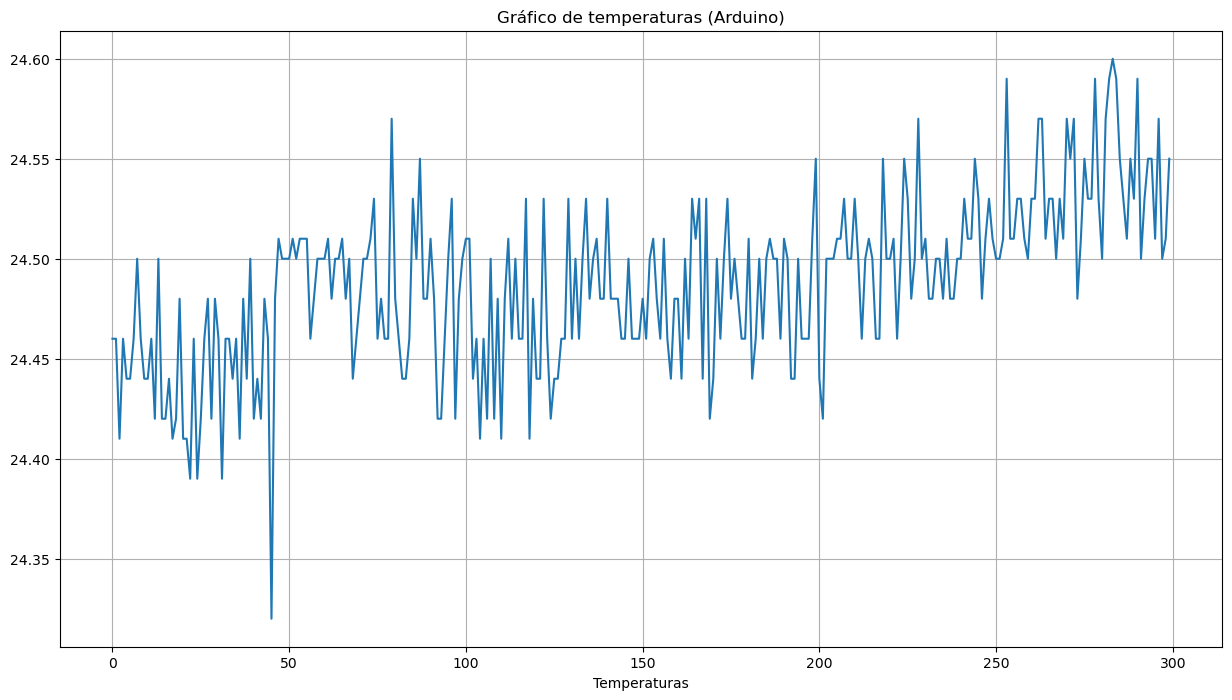

In [89]:
plt.figure(figsize=(15, 8)) # Tamanho do gráfico
plt.plot(temps)
plt.title('Gráfico de temperaturas (Arduino)')
plt.xlabel('Temperaturas')
plt.ylabel('')
plt.grid(True)
plt.show()

## Gerar dados grandezas de estatística descritiva

Nesta secção irem ser gerados dados como **media**, **mediana**, **desvio padrão**, **valor máximo e mínimo**. Para gerar estes dados irei usar a bibilioteca ```statistics```.

In [69]:
def estatistica(target, name):
    avg = st.mean(target)
    median = st.median(target)
    stdv = st.stdev(target)
    maxV = max(target)
    minV = min(target)

    print("Media {}: {}".format(name, avg))
    print("Mediana {}: {}".format(name, median))
    print("Desvio padrão {}: {}".format(name, stdv))
    print("Valor máximo {}: {}".format(name, maxV))
    print("Valor mínimo{}: {}\n".format(name, minV))
    return avg, median, stdv, maxV, minV

avg, median, stdv, maxV, minV = estatistica(temps, "Temperaturas")

Media Temperaturas: 24.4873
Mediana Temperaturas: 24.5
Desvio padrão Temperaturas: 0.04193931752562316
Valor máximo Temperaturas: 24.6
Valor mínimoTemperaturas: 24.32



## Visualização das temperaturas com um histograma

Para melhor visualisarmos as temperaturas usei um histograma uma funcão da biblioteca ```matplotlib```, ```hist()```.

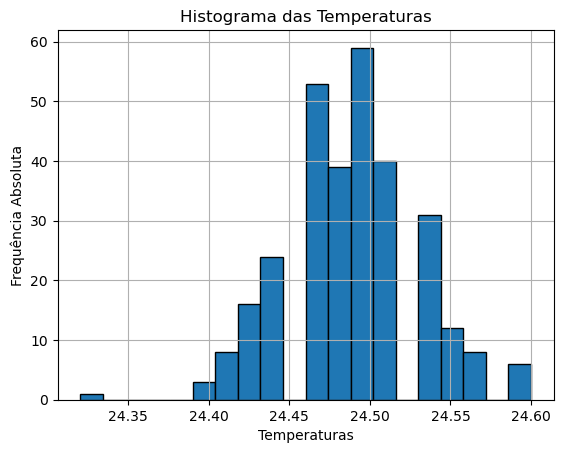

In [70]:
# Bins = número de intervalos (melhor visualisação)
plt.hist(temps, bins=20, edgecolor='black')
plt.title('Histograma das Temperaturas')
plt.xlabel('Temperaturas')
plt.ylabel('Frequência Absoluta')
plt.grid(True)
plt.show()

## Criar um report

Para criar um report com as estatísticas obtidas será usado a própria biblioteca padrão do python para escrever um ficheiro chamado ```report.txt```.  
Para escrever o ficheiro foi necessário forçar a que fosse utf-8[3].

In [71]:
def createReport(avg, median, stdv, maxV, minV, arduinoModel, version, date, name, filename):
    report = "Modelo do Arduino: {}\nData: {}".format(arduinoModel, date) 
    report += "\nVersão: {}\nEstatísticas {}:\nMedia: {}".format(version, name, avg)
    report += "\nMediana: {}\nDesvio Padrão: {}\nValor máximo: {}".format(median, stdv, maxV)
    report += "\nValor mínimo: {}".format(minV)
    print(report)
    print("\n")
    #f = open('report.txt', 'w', 'utf-8')
    f = codecs.open("{}.txt".format(filename), "w", "utf-8")
    f.write(report)
    f.close()

createReport(avg, median, stdv, maxV, minV, 'Arduino BLE 33 Sense', '1.0', '04/01/2024 16:57', 
             'Temperaturas do Arduino', 'report')

Modelo do Arduino: Arduino BLE 33 Sense
Data: 04/01/2024 16:57
Versão: 1.0
Estatísticas Temperaturas do Arduino:
Media: 24.4873
Mediana: 24.5
Desvio Padrão: 0.04193931752562316
Valor máximo: 24.6
Valor mínimo: 24.32




## Leitura de dados do ficheiro fornecido ```dados_sensores.csv```

Para leitura destes dados optei pelo uso da biblioteca ```pandas``` já que este ficheiro tem mais dados que o anterior e assim será mais fácil interpretar estes dados. Os dados foram guardados como uma lista graças ao método ```to_dict(orient='list')```.    
Ainda foi necessário separar os dados de cada coluna para ser mais fácil o manoseio dos dados.

In [72]:
sensor_data = pd.read_csv('../dados/dados_sensores.csv')

sensor_data = sensor_data.to_dict(orient='list')
print(sensor_data)

# Separar os dados em listas diferentes
hour = sensor_data["'HH:MM:SS.SSS'"]
t1 = sensor_data[" 'T1(C)'"] 
t2 = sensor_data["'T2(C)'"] 
pa = sensor_data[" 'P(hPa)'"] 
hr = sensor_data[" 'HR(%)'"]  

{"'HH:MM:SS.SSS'": ['12:06:01.429', '12:06:02.454', '12:06:03.489', '12:06:04.516', '12:06:05.548', '12:06:06.530', '12:06:07.563', '12:06:08.591', '12:06:09.623', '12:06:10.655', '12:06:11.687', '12:06:12.669', '12:06:13.703', '12:06:14.735', '12:06:15.768', '12:06:16.794', '12:06:17.824', '12:06:18.810', '12:06:19.843', '12:06:20.874', '12:06:21.906', '12:06:22.934', '12:06:23.917', '12:06:24.977', '12:06:26.005', '12:06:26.999', '12:06:28.030', '12:06:29.059', '12:06:30.090', '12:06:31.116', '12:06:32.142', '12:06:33.172', '12:06:34.153', '12:06:35.183', '12:06:36.213', '12:06:37.246', '12:06:38.270', '12:06:39.301', '12:06:40.326', '12:06:41.311', '12:06:42.344', '12:06:43.373', '12:06:44.401', '12:06:45.430', '12:06:46.459', '12:06:47.487', '12:06:48.468', '12:06:49.496', '12:06:50.529', '12:06:51.558', '12:06:52.585', '12:06:53.614', '12:06:54.642', '12:06:55.673', '12:06:56.660', '12:06:57.692', '12:06:58.720', '12:06:59.749', '12:07:00.780', '12:07:01.811', '12:07:02.795', '12:

## Gráfico sensor de temperatura  - 1

Para gerar os gráficos mais uma vez foi feito uso de biblioteca ```matplotlib```. 

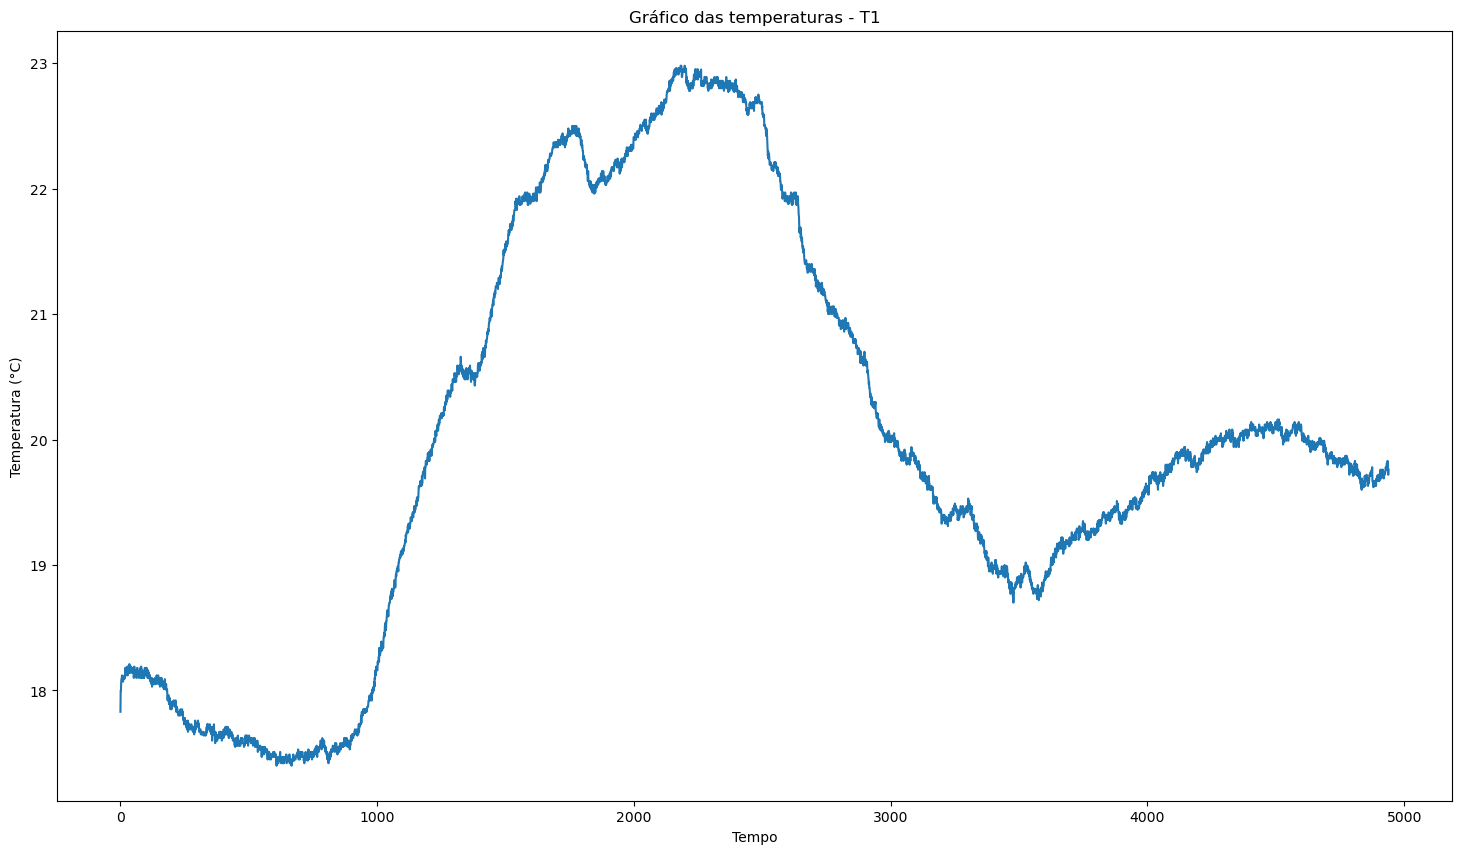

In [94]:
plt.figure(figsize=(18, 10))  # Define o tamanho da figura
# Gerar gráfico com o eixo do x com a mesma quantidade de temperaturas
plt.plot(list(np.arange(1, len(hour) + 1)), t1, linestyle='-')
plt.title('Gráfico das temperaturas - T1')
plt.xlabel('Tempo')
plt.ylabel('Temperatura (°C)')
#plt.xticks(rotation=45) 
plt.show()


## Gráfico sensor de temperatura - 2

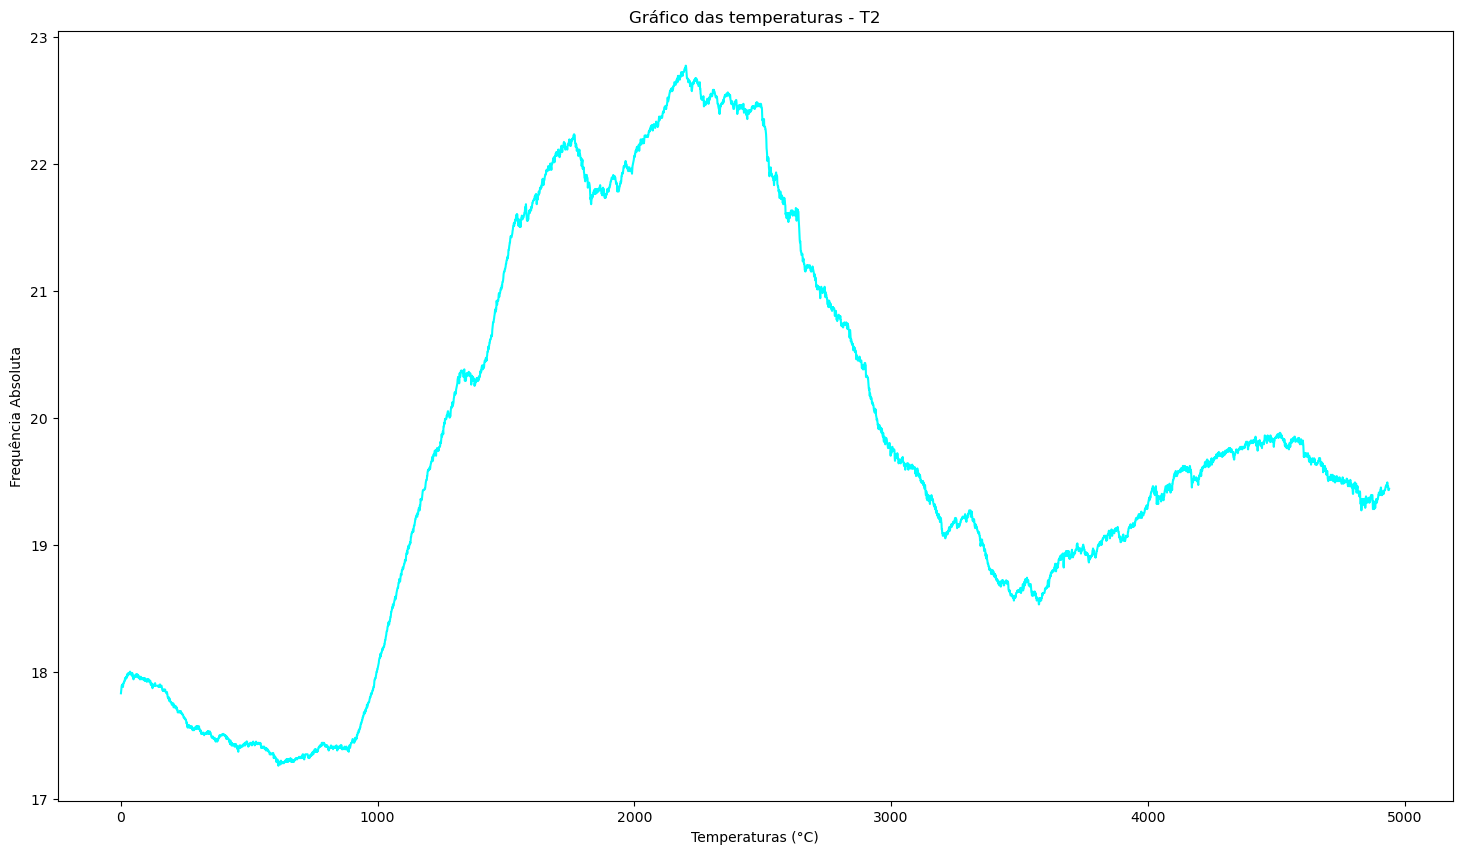

In [74]:
plt.figure(figsize=(18, 10))  # Define o tamanho da figura
plt.plot(list(np.arange(1, len(hour) + 1)), t2, color='aqua')
plt.title('Gráfico das temperaturas - T2')
plt.xlabel('Temperaturas (°C)')
plt.ylabel('Frequência Absoluta')
plt.show()


## Gráfico sensor de Pressão Atmosférica

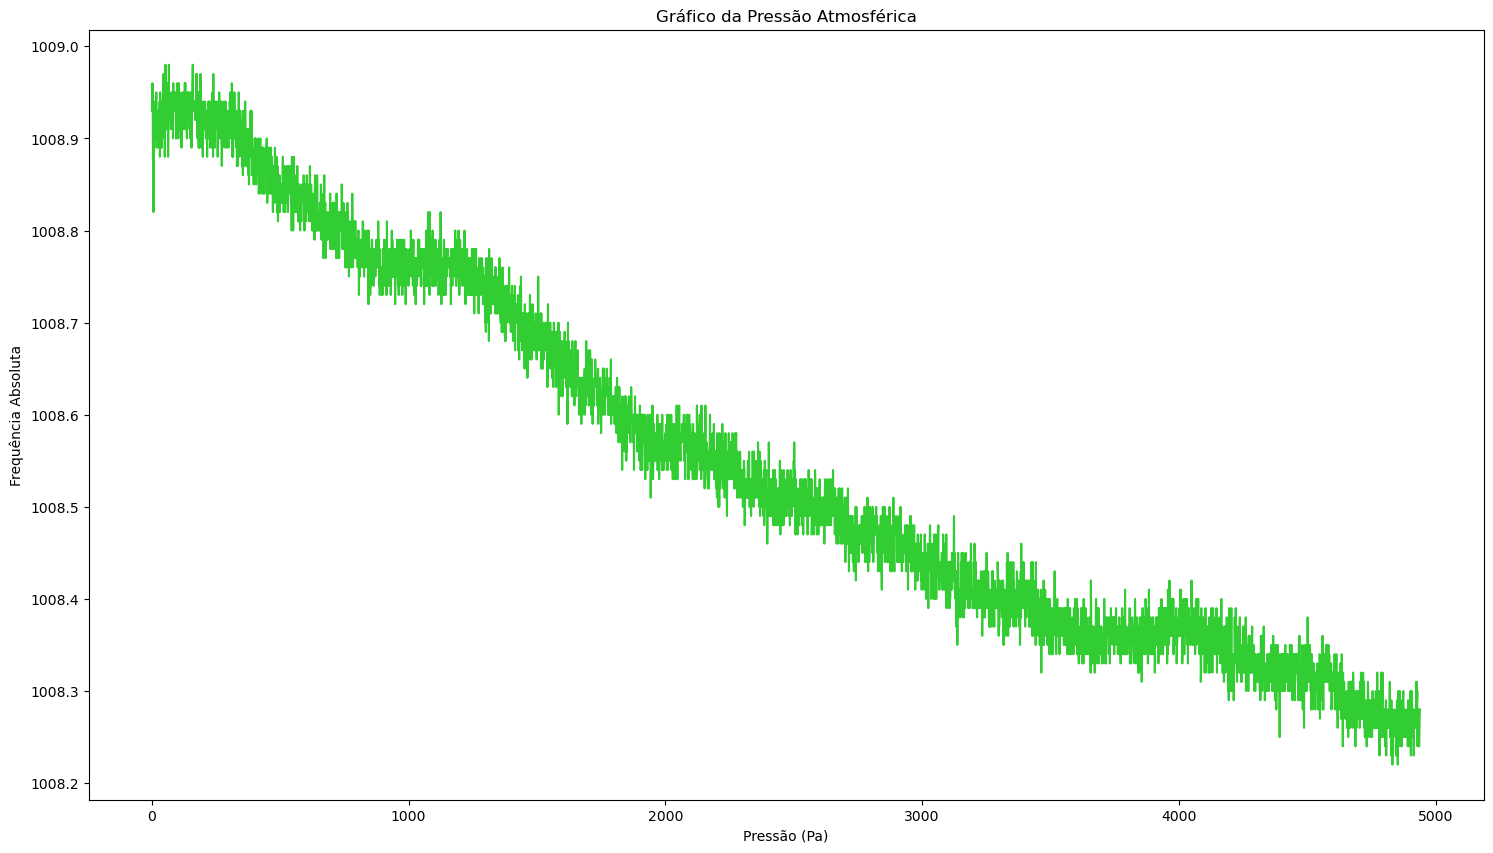

In [75]:
plt.figure(figsize=(18, 10)) # Define o tamanho da figura
plt.plot(list(np.arange(1, len(hour) + 1)), pa, color='limegreen')
plt.title('Gráfico da Pressão Atmosférica')
plt.xlabel('Pressão (Pa)')
plt.ylabel('Frequência Absoluta')
plt.show()

## Gráfico sensor de Humidade

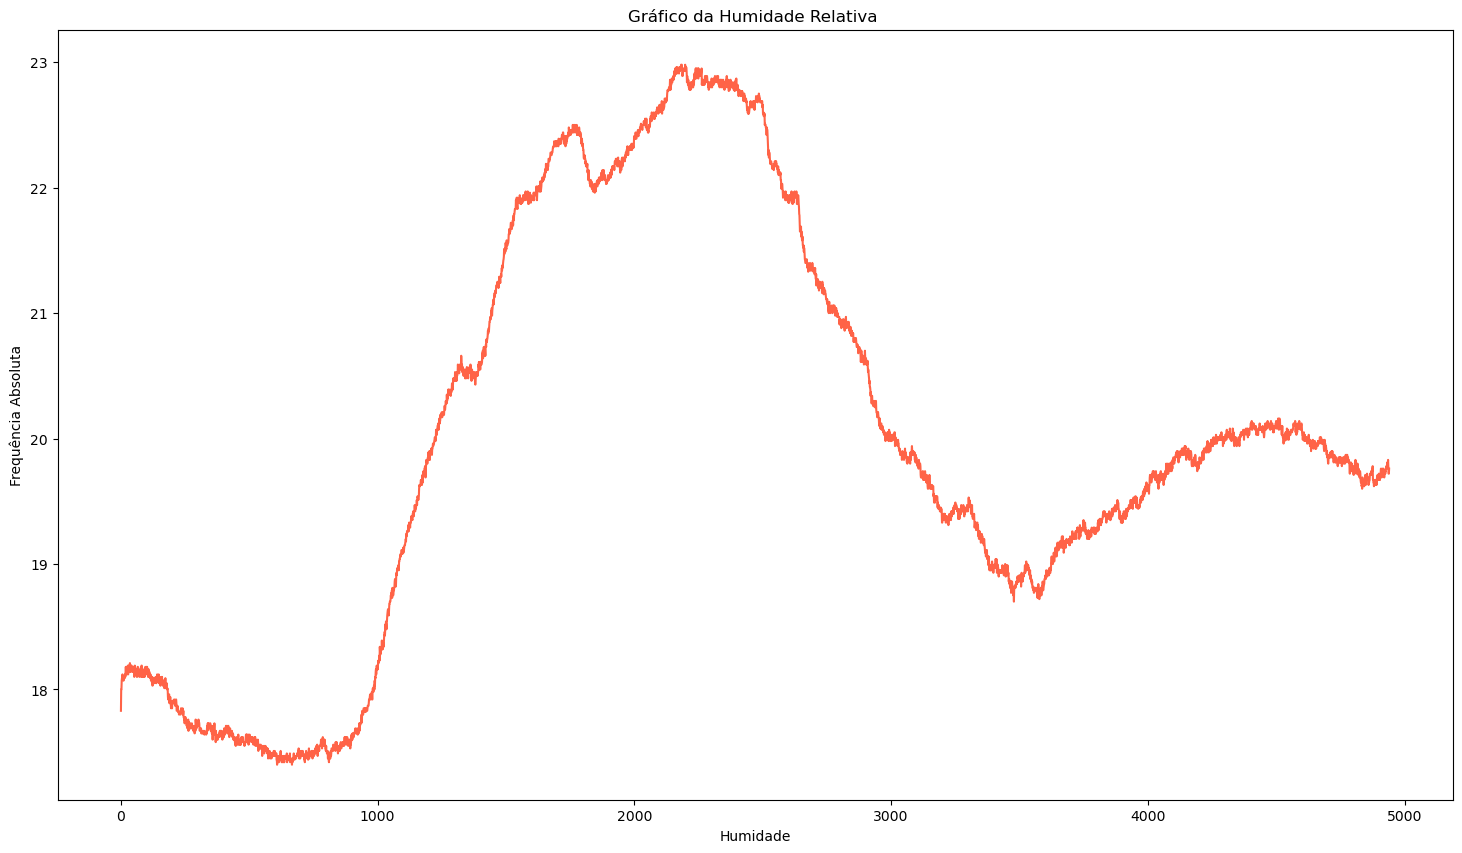

In [76]:
plt.figure(figsize=(18, 10))  # Define o tamanho da figura
plt.plot(list(np.arange(1, len(hour) + 1)), t1, color='tomato')
plt.title('Gráfico da Humidade Relativa ')
plt.xlabel('Humidade')
plt.ylabel('Frequência Absoluta')
plt.show()

## Gerar dados grandezas de estatística descritiva

É o mesmo que já foi feito acima mas com os dados do segundo ficheiro.

In [77]:
avgT1, medianT1, stdvT1, maxVT1, minVT1 = estatistica(t1, 'Temperatura 1')
avgT2, medianT2, stdvT2, maxVT2, minVT2 = estatistica(t2, 'Temperatura 2')
avgPA, medianPA, stdvPA, maxVPA, minVPA = estatistica(t2, 'Pressão Atmosférica')
avgHR, medianHR, stdvHR, maxVHR, minVHR = estatistica(t2, 'Humidade Relativa')

Media Temperatura 1: 19.992322332455963
Mediana Temperatura 1: 19.85
Desvio padrão Temperatura 1: 1.6406796830480632
Valor máximo Temperatura 1: 22.98
Valor mínimoTemperatura 1: 17.4

Media Temperatura 2: 19.741951812107715
Mediana Temperatura 2: 19.55
Desvio padrão Temperatura 2: 1.6041707351069867
Valor máximo Temperatura 2: 22.77
Valor mínimoTemperatura 2: 17.26

Media Pressão Atmosférica: 19.741951812107715
Mediana Pressão Atmosférica: 19.55
Desvio padrão Pressão Atmosférica: 1.6041707351069867
Valor máximo Pressão Atmosférica: 22.77
Valor mínimoPressão Atmosférica: 17.26

Media Humidade Relativa: 19.741951812107715
Mediana Humidade Relativa: 19.55
Desvio padrão Humidade Relativa: 1.6041707351069867
Valor máximo Humidade Relativa: 22.77
Valor mínimoHumidade Relativa: 17.26



## Visualização das Temperaturas T1, T2, Pressão Atmosféria e Humidade Relativa com um Histograma

### Temperaturas - T1

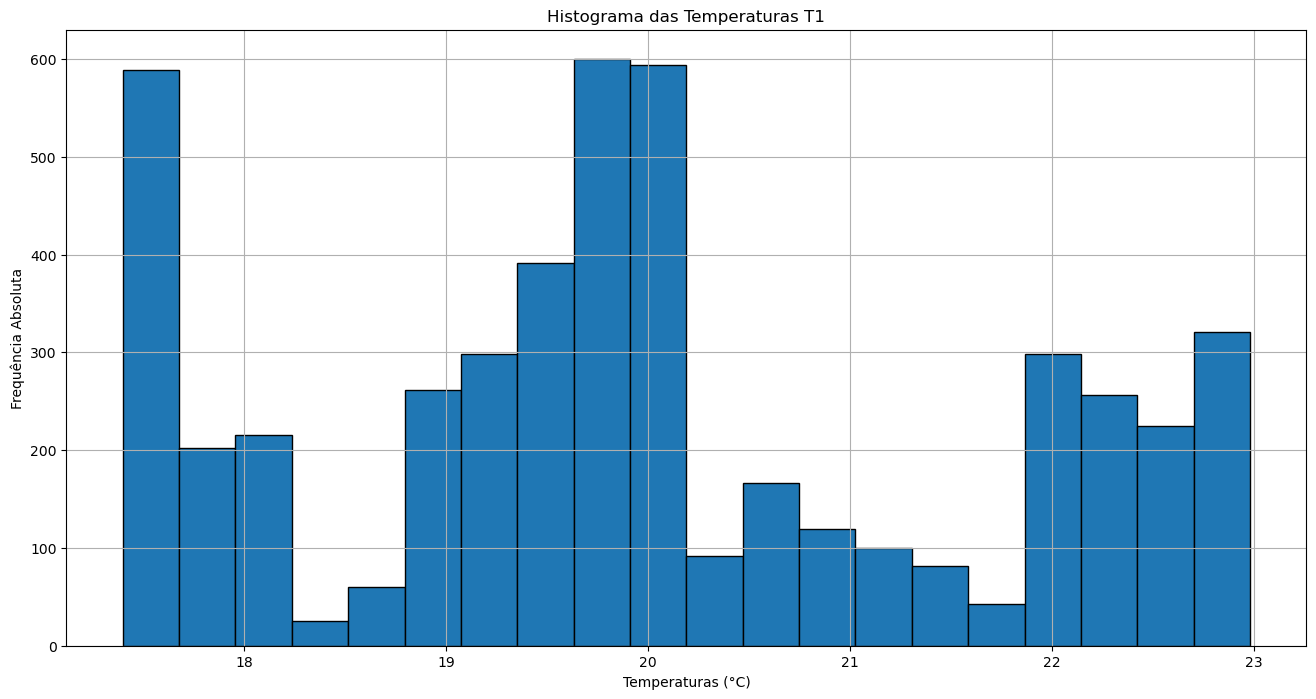

In [78]:
plt.figure(figsize=(16, 8))
plt.hist(t1, bins=20, edgecolor='black')
plt.title('Histograma das Temperaturas T1')
plt.xlabel('Temperaturas (°C)')
plt.ylabel('Frequência Absoluta')
plt.grid(True)
plt.show()

### Temperaturas - T2

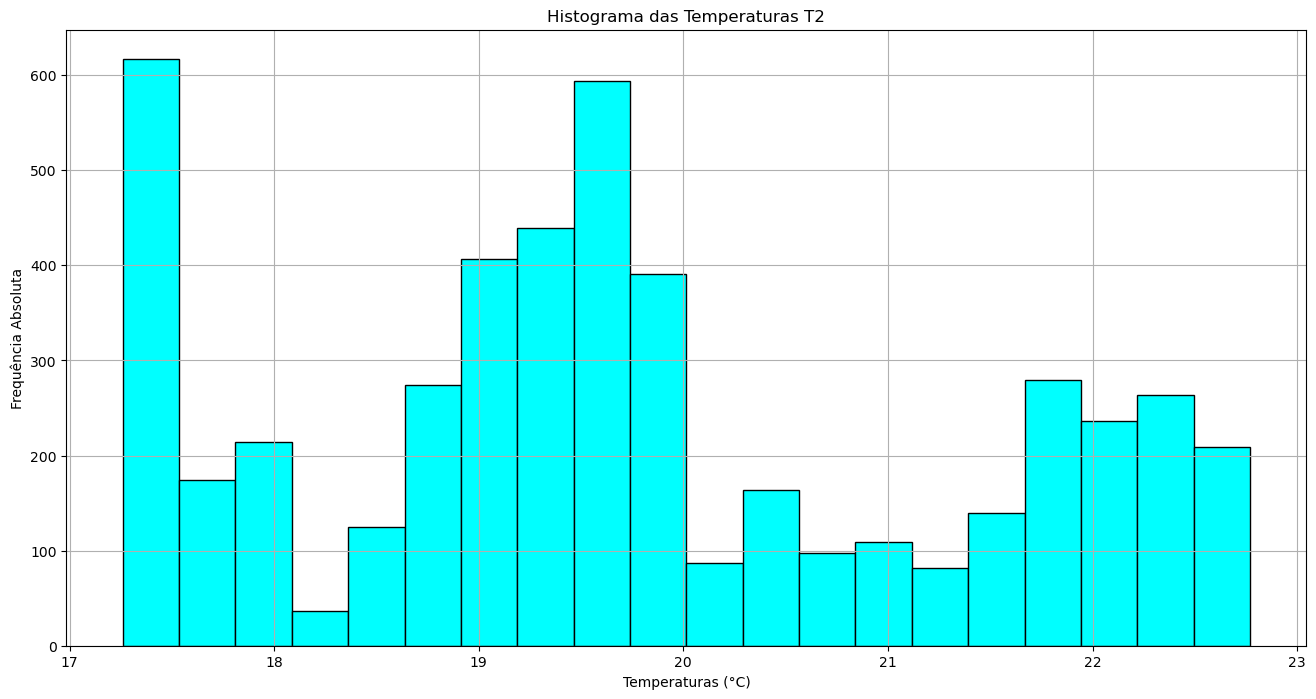

In [79]:
plt.figure(figsize=(16, 8))
plt.hist(t2, bins=20, edgecolor='black', color='aqua')
plt.title('Histograma das Temperaturas T2')
plt.xlabel('Temperaturas (°C)')
plt.ylabel('Frequência Absoluta')
plt.grid(True)
plt.show()

### Temperaturas - Pressão Amosférica

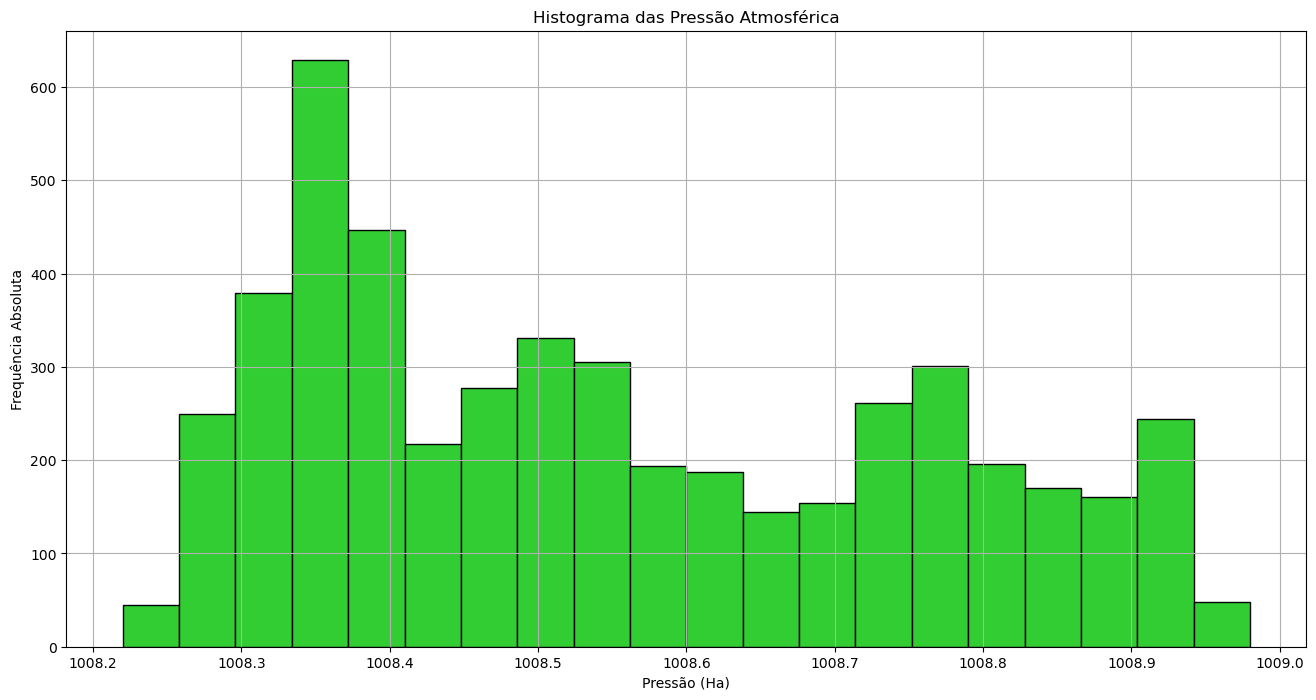

In [80]:
plt.figure(figsize=(16, 8))
plt.hist(pa, bins=20, edgecolor='black', color='limegreen')
plt.title('Histograma das Pressão Atmosférica')
plt.xlabel('Pressão (Ha)')
plt.ylabel('Frequência Absoluta')
plt.grid(True)
plt.show()

### Temperaturas - Humidade Relativa

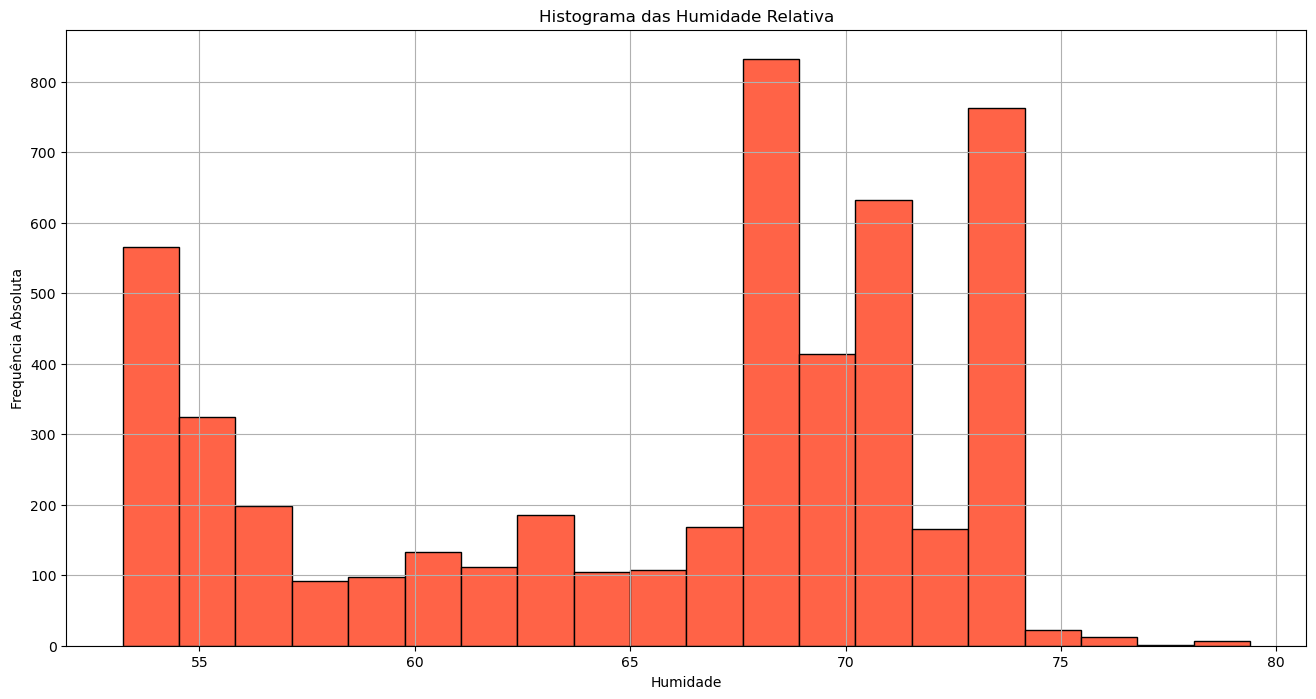

In [81]:
plt.figure(figsize=(16, 8))
plt.hist(hr, bins=20, edgecolor='black', color="tomato")
plt.title('Histograma das Humidade Relativa')
plt.xlabel('Humidade')
plt.ylabel('Frequência Absoluta')
plt.grid(True)
plt.show()

## Criar reports: Temperaturas T1, T2, Pressão Atmosféria e Humidade Relativa

In [82]:
createReport(avgT1, medianT1, stdvT1, maxVT1, minVT1, 'Arduino BLE 33 Sense', '1.0', 
             '17/12/2023 19:40', 'Temperaturas T1', 'report_t1')
createReport(avgT2, medianT2, stdvT2, maxVT2, minVT2, 'Arduino BLE 33 Sense', '1.0', 
             '17/12/2023 19:40', 'Temperaturas T2', 'report_t2')
createReport(avgPA, medianPA, stdvPA, maxVPA, minVPA, 'Arduino BLE 33 Sense', '1.0', 
              '17/12/2023 19:40', 'Pressão Atmosférica', 'report_pa')
createReport(avgHR, medianHR, stdvHR, maxVHR, minVHR, 'Arduino BLE 33 Sense', '1.0', 
              '17/12/2023 19:40', 'Humidade Relativa', 'report_hr')

Modelo do Arduino: Arduino BLE 33 Sense
Data: 17/12/2023 19:40
Versão: 1.0
Estatísticas Temperaturas T1:
Media: 19.992322332455963
Mediana: 19.85
Desvio Padrão: 1.6406796830480632
Valor máximo: 22.98
Valor mínimo: 17.4


Modelo do Arduino: Arduino BLE 33 Sense
Data: 17/12/2023 19:40
Versão: 1.0
Estatísticas Temperaturas T2:
Media: 19.741951812107715
Mediana: 19.55
Desvio Padrão: 1.6041707351069867
Valor máximo: 22.77
Valor mínimo: 17.26


Modelo do Arduino: Arduino BLE 33 Sense
Data: 17/12/2023 19:40
Versão: 1.0
Estatísticas Pressão Atmosférica:
Media: 19.741951812107715
Mediana: 19.55
Desvio Padrão: 1.6041707351069867
Valor máximo: 22.77
Valor mínimo: 17.26


Modelo do Arduino: Arduino BLE 33 Sense
Data: 17/12/2023 19:40
Versão: 1.0
Estatísticas Humidade Relativa:
Media: 19.741951812107715
Mediana: 19.55
Desvio Padrão: 1.6041707351069867
Valor máximo: 22.77
Valor mínimo: 17.26




## Correlação
  
Para conseguirmos visualizar uma correlação[1][2] entre estas variáveis usei o scatter plot. Este tipo de gráfico é chamado de gráfico de dispersão.

### Correlação entre a Temperatura 1 e 2

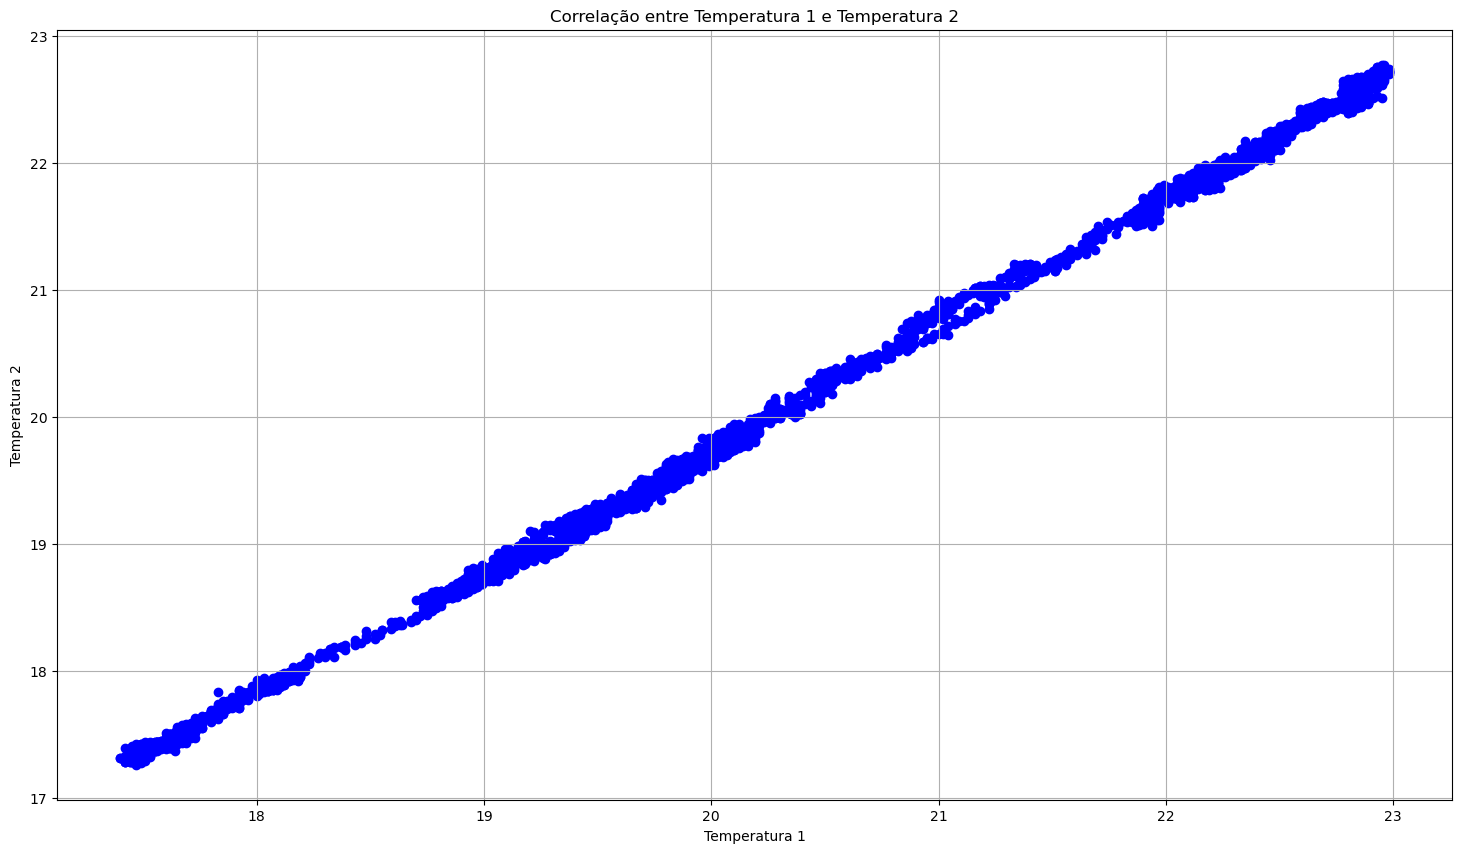

In [83]:
plt.figure(figsize=(18, 10))
plt.scatter(t1, t2, color='blue')
plt.title('Correlação entre Temperatura 1 e Temperatura 2')
plt.xlabel('Temperatura 1')
plt.ylabel('Temperatura 2')
plt.grid(True)
plt.show()

### Correlação entre a Temperatura 1 e Pressão Atmosférica

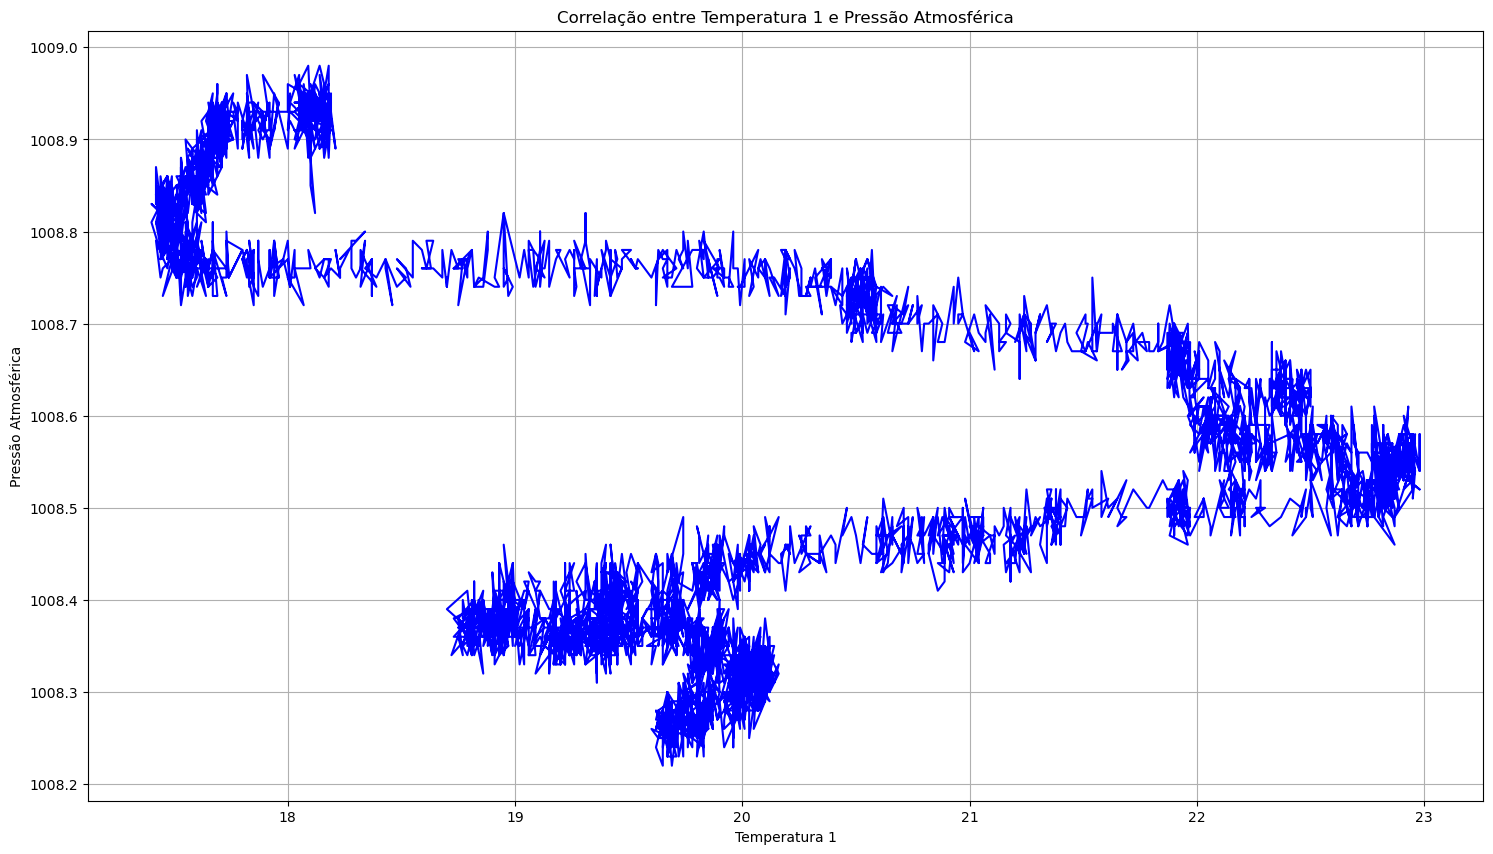

In [84]:
plt.figure(figsize=(18, 10))
plt.plot(t1, pa, color='blue')
plt.title('Correlação entre Temperatura 1 e Pressão Atmosférica')
plt.xlabel('Temperatura 1')
plt.ylabel('Pressão Atmosférica')
plt.grid(True)
plt.show()

### Correlação entre a Temperatura 1 e Humidade Relativa

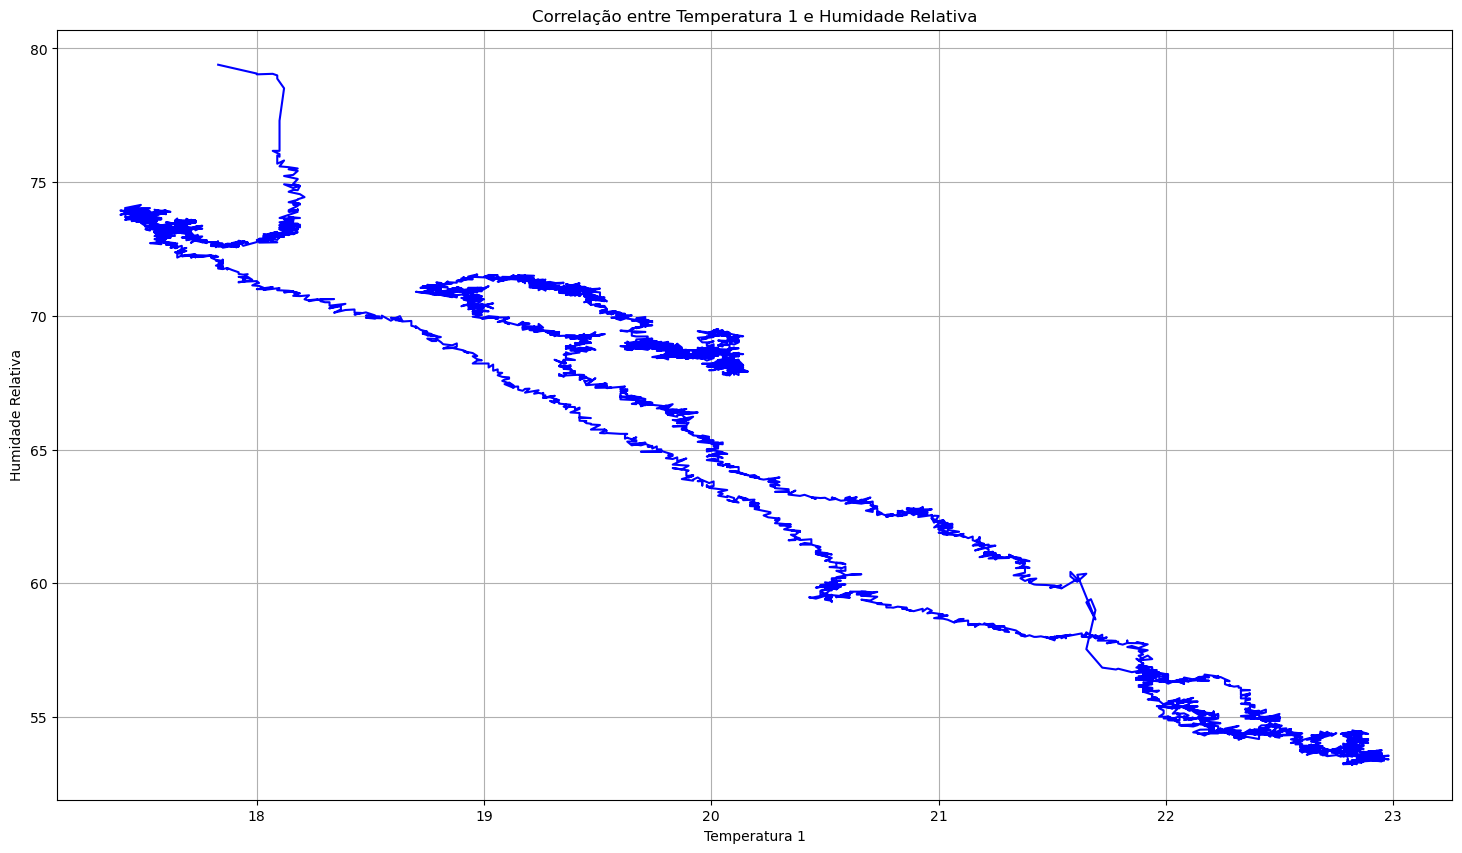

In [85]:
plt.figure(figsize=(18, 10))
plt.plot(t1, hr, color='blue')
plt.title('Correlação entre Temperatura 1 e Humidade Relativa')
plt.xlabel('Temperatura 1')
plt.ylabel('Humidade Relativa')
plt.grid(True)
plt.show()

## Análise da correlação

Para fazer a análise podemos fazer de duas formas, interpretandos os gráficos ou até mesmo usando uma função da biblioteca ```numpy``` a ```corrcoef()``` que irá calcular o coeficiente da correlação de Pearson.  
O **coeficiente** nada mais é que quanto mais perto de **1** a linearidade é **perfeita entre** as duas variávies, se for **0** quer dizer que não estão **correlacionadas** e se estiver perto ou **-1** são **inversamente correlacionadas**.  
No caso das **temperaturas 1 e 2**, estas estão correlacionadas devido ao seu coeficiente ser de **0.9993**, esta é uma correlação quase **perfeita**, ou seja, têm **relação linear quase perfeita**. Isto sugere que por exemplo se a temperatura descer as mesmas irão descer praticamente com a mesma porporcionalidade.

In [86]:
correlationT1T2 = np.corrcoef(t1, t2)[0, 1]
correlationT1PA = np.corrcoef(t1, pa)[0, 1]
correlationT1HR = np.corrcoef(t1, hr)[0, 1]
print("Correlação entre Temperatura 1 e Temperatura 2:", correlationT1T2)
print("Correlação entre Temperatura 1 e Pressão Atmosférica:", correlationT1PA)
print("Correlação entre Temperatura 1 e Humidade Relativa:", correlationT1HR)

Correlação entre Temperatura 1 e Temperatura 2: 0.9993350447116887
Correlação entre Temperatura 1 e Pressão Atmosférica: -0.3246239656052591
Correlação entre Temperatura 1 e Humidade Relativa: -0.9596024790282941


### Bibliografia 

[1] M. J. Brydon, "Correlation - SFU Computer Science," [Online]. Available: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html. [Accessed: Jan. 25, 2024].  
[2] Real Python, "Using NumPy, SciPy, and Pandas: Correlation With Python," [Online]. Available: https://realpython.com/numpy-scipy-pandas-correlation-python/#example-numpy-correlation-calculation. [Accessed: Jan. 25, 2024].  
[3] Stack Overflow. "Write to UTF-8 file in Python". [Online]. Available: https://stackoverflow.com/questions/934160/write-to-utf-8-file-in-python. [Accessed: Jan. 25, 2024].
